<a href="https://colab.research.google.com/github/srijan-27/Cureya/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cureya Week-3 Task: HOUSE PRICE PREDICTION

> **Executed By: Srijan Rastogi | srastogi751@gmail.com**



### **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance
from sklearn import metrics  
from sklearn import datasets
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras import Model

from warnings import filterwarnings
filterwarnings(action='ignore')

### **Read CSV File**

In [2]:
url = "https://raw.githubusercontent.com/srijan-27/Cureya/main/HousingData.csv"
data = pd.read_csv(url)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **Check for Null Values**

In [3]:
print(data.isna().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


### **Drop Null Values**

In [4]:
dataset = data.dropna()
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [5]:
print(dataset.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### **Data Summarization**

In [6]:
print(dataset.shape)
print(dataset.head(10))

(394, 14)
       CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0   0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94  33.4
5   0.02985   0.0   2.18   0.0  0.458  ...  222     18.7  394.12   5.21  28.7
7   0.14455  12.5   7.87   0.0  0.524  ...  311     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87   0.0  0.524  ...  311     15.2  386.63  29.93  16.5
10  0.22489  12.5   7.87   0.0  0.524  ...  311     15.2  392.52  20.45  15.0
11  0.11747  12.5   7.87   0.0  0.524  ...  311     15.2  396.90  13.27  18.9
12  0.09378  12.5   7.87   0.0  0.524  ...  311     15.2  390.50  15.71  21.7

[10 rows x 14 columns]


In [7]:
print(dataset.tail(10))

        CRIM   ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
494  0.27957  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  13.59  24.5
495  0.17899  0.0   9.69   0.0  0.585  ...  391     19.2  393.29  17.60  23.1
496  0.28960  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  21.14  19.7
497  0.26838  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  14.10  18.3
498  0.23912  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  12.92  21.2
499  0.17783  0.0   9.69   0.0  0.585  ...  391     19.2  395.77  15.10  17.5
500  0.22438  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  14.33  16.8
502  0.04527  0.0  11.93   0.0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076  0.0  11.93   0.0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959  0.0  11.93   0.0  0.573  ...  273     21.0  393.45   6.48  22.0

[10 rows x 14 columns]


In [8]:
print(dataset.describe())

             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  394.000000  394.000000  394.000000  ...  394.000000  394.000000  394.000000
mean     3.690136   11.460660   11.000863  ...  358.490939   12.769112   22.359645
std      9.202423   23.954082    6.908364  ...   89.283295    7.308430    9.142979
min      0.006320    0.000000    0.460000  ...    2.600000    1.730000    5.000000
25%      0.081955    0.000000    5.130000  ...  376.707500    7.125000   16.800000
50%      0.268880    0.000000    8.560000  ...  392.190000   11.300000   21.050000
75%      3.435973   12.500000   18.100000  ...  396.900000   17.117500   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


### **Data Visualization**

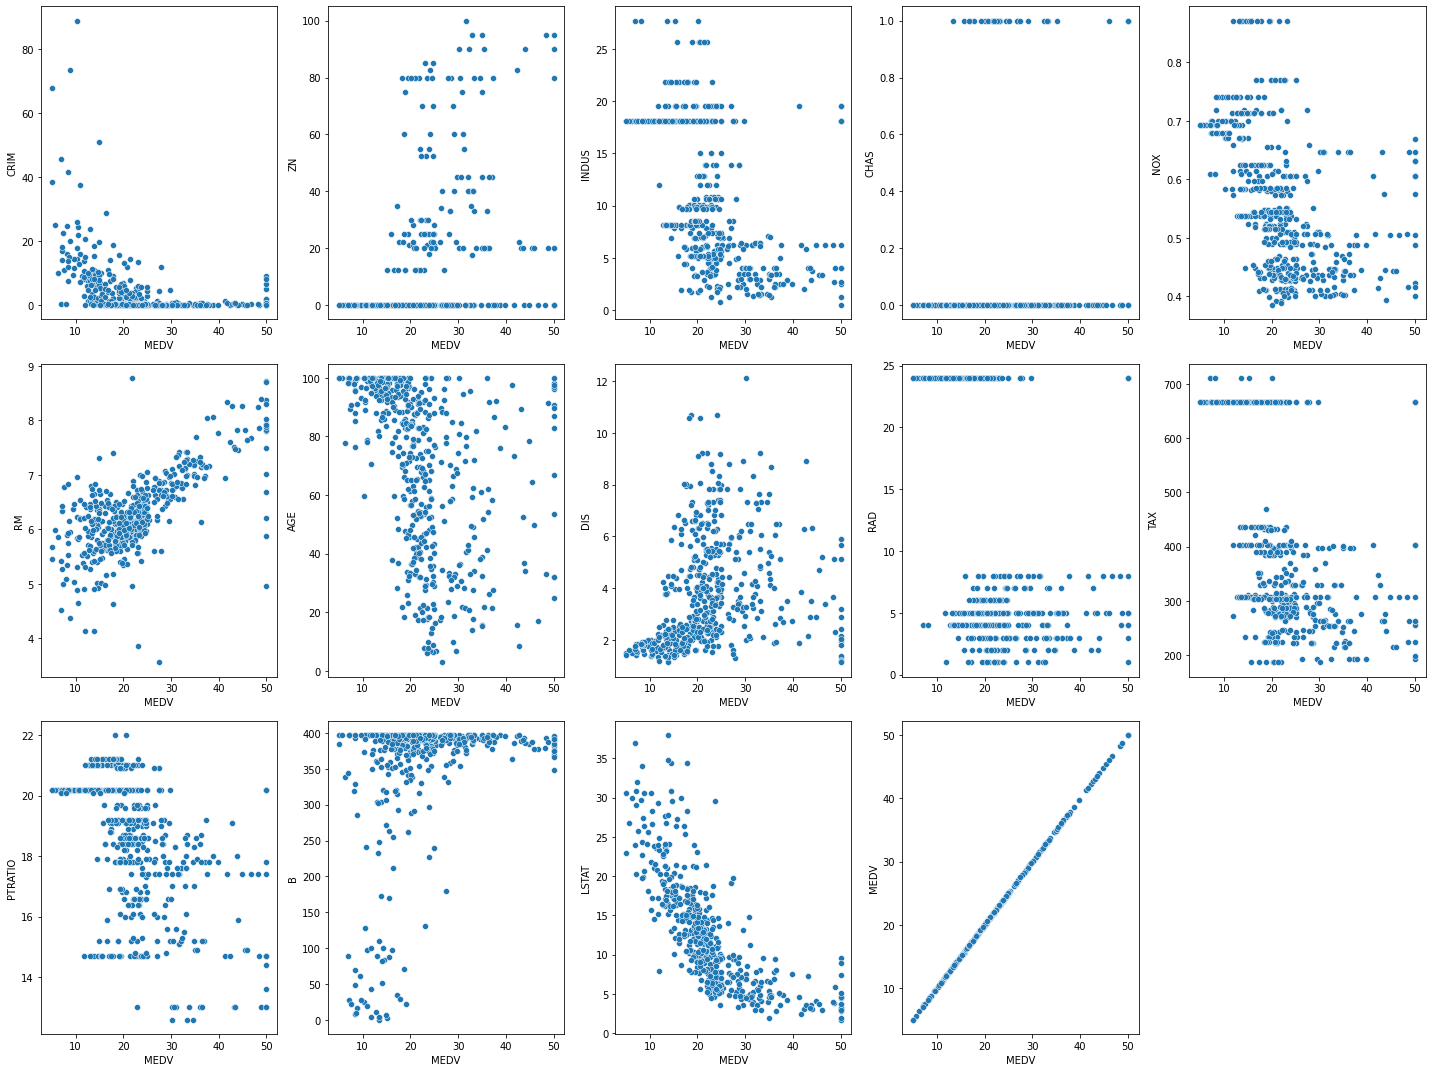

In [9]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = data['MEDV'], y = data[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [10]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


Text(0.5, 1.0, 'Multi-Collinearity of House Attributes')

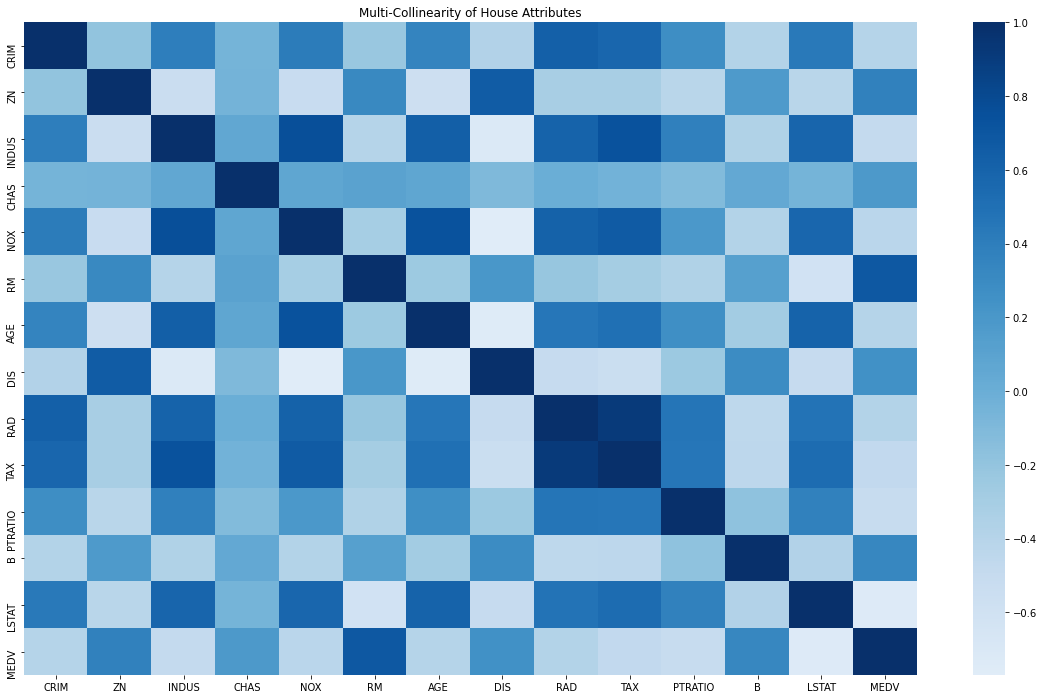

In [11]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(), center=0, cmap='Blues')
ax.set_title('Multi-Collinearity of House Attributes')

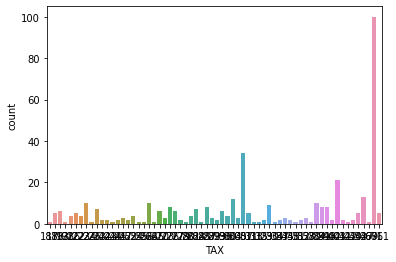

In [12]:
k = 'TAX'
sns.countplot(dataset[k])

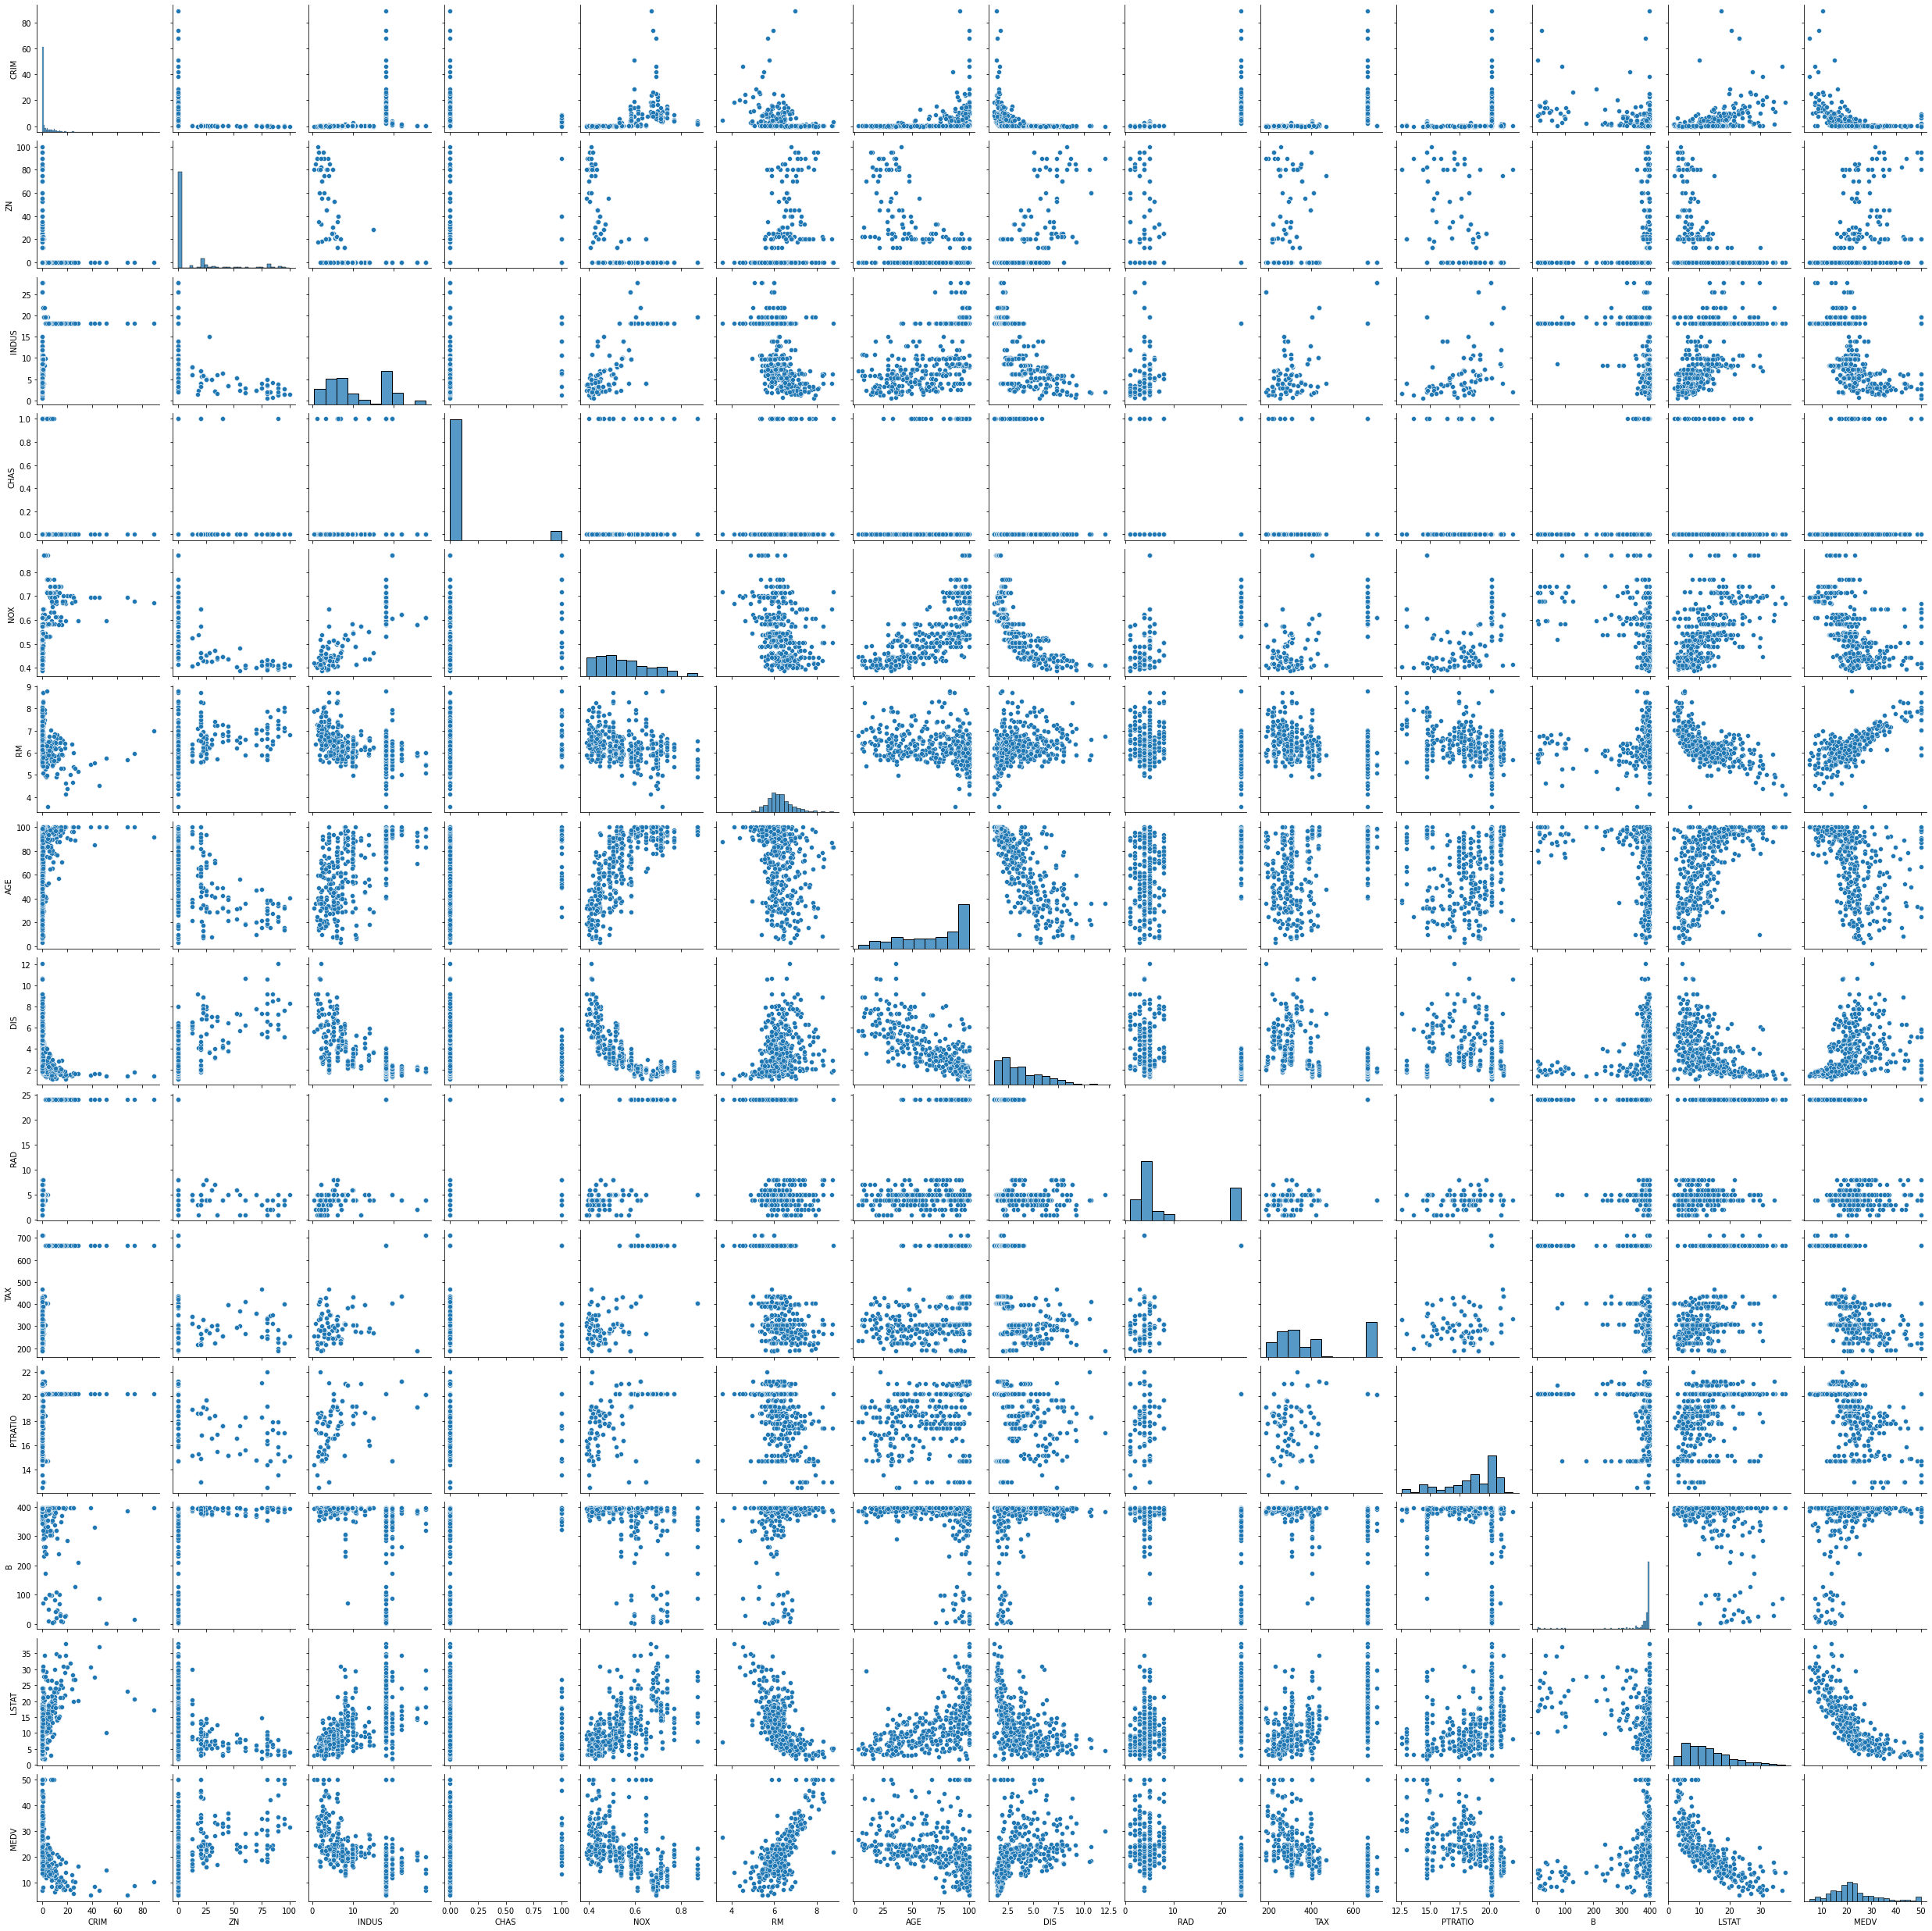

In [13]:
sns.pairplot(dataset)

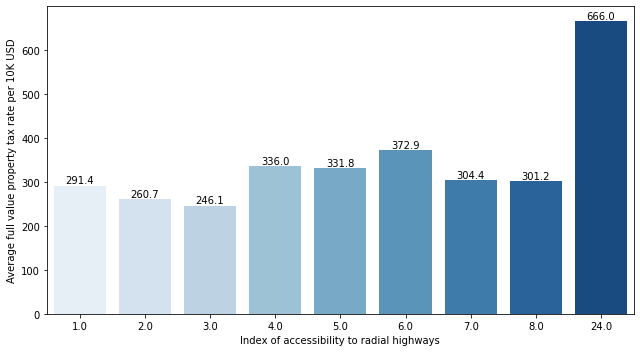

In [14]:
TARGET_COL = 'MEDV'
TARGET = data[TARGET_COL]
FEATURES = data.drop(columns=[TARGET_COL])
fig, ax = plt.subplots(figsize=(9,5))
splot = sns.barplot(data=FEATURES.groupby('RAD')[['RAD', 'TAX']].agg(np.mean), x='RAD', y= 'TAX', ax=ax , palette='Blues')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points'
                  )
plt.ylabel('Average full value property tax rate per 10K USD')
plt.xlabel('Index of accessibility to radial highways')
plt.tight_layout()

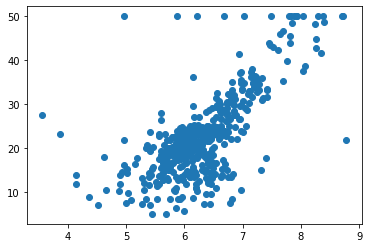

In [15]:
predictor = data[["RM"]]
target = data[["MEDV"]]
plt.scatter(predictor,target)

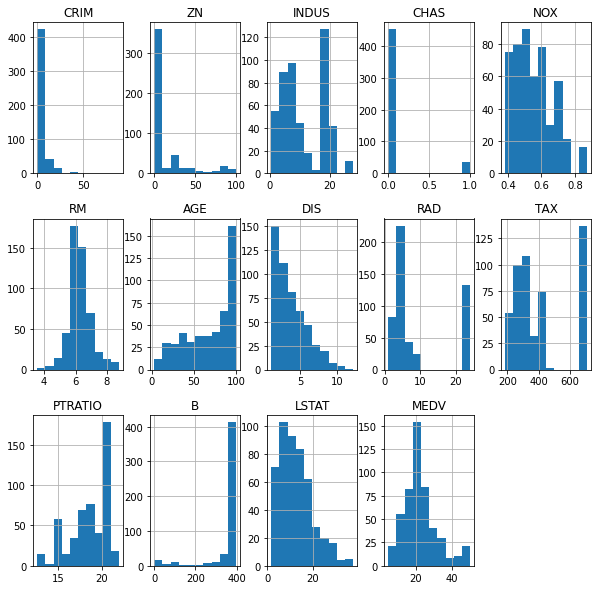

In [16]:
data.hist(figsize=(10,10), layout=(3,5))
plt.show()

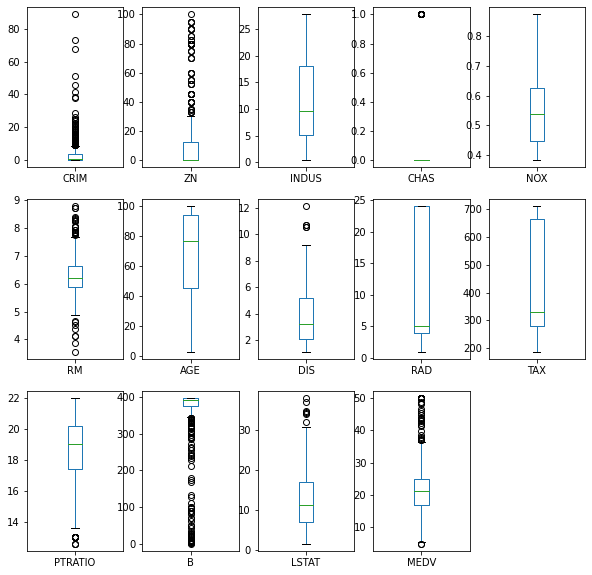

In [17]:
data.plot(kind='box',figsize=(10,10),subplots=True,layout=(3,5))
plt.show()

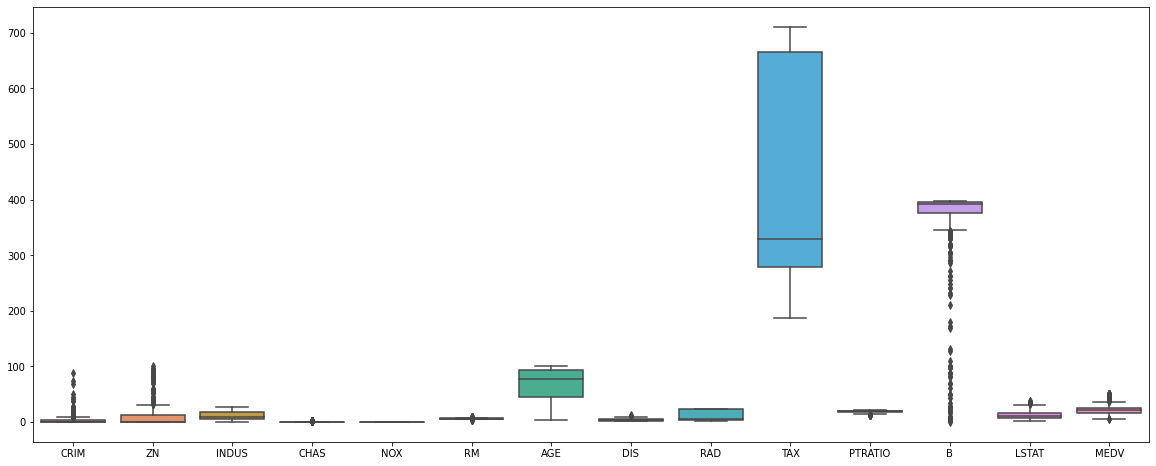

In [18]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = data, width = 0.8)
plt.show()

### **Observations**

Houses with more rooms(higher 'RM' value) will worth more. Usually houses with more rooms bigger and can fit more people, so it is reasonable that they cost more.

### **Splitting Dataset into Training and Testing Dataset**

In [19]:
X = dataset.drop('MEDV',axis=1)
y = dataset['MEDV']
print(dataset.shape)
print(X.shape)
print(y.shape)

(394, 14)
(394, 13)
(394,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (315, 13)
X_test:  (79, 13)
y_train:  (315,)
y_test:  (79,)


In [21]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### **Linear Regression**

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Intercept: ", regressor.intercept_)

Intercept:  27.523367978776168


In [24]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.065215
ZN,0.039762
INDUS,0.016576
CHAS,2.994369
NOX,-17.356827
RM,5.177063
AGE,-0.022273
DIS,-1.309754
RAD,0.249827
TAX,-0.013922


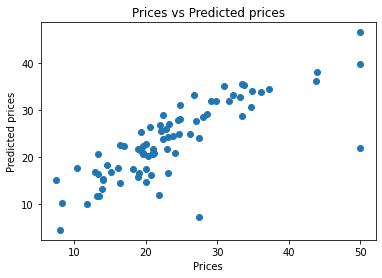

In [25]:
pred_linreg = regressor.predict(X_test)
plt.scatter(y_test,pred_linreg)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

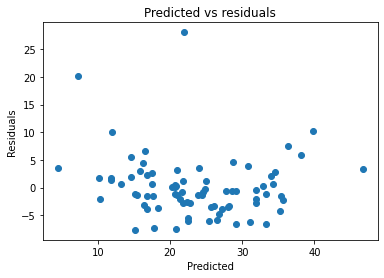

In [26]:
plt.scatter(pred_linreg,y_test-pred_linreg)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Text(0.5, 1.0, 'Distribution of the predicted values')

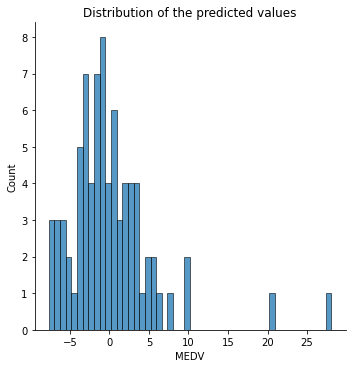

In [27]:
sns.displot((y_test-pred_linreg),bins=50)
plt.title("Distribution of the predicted values")

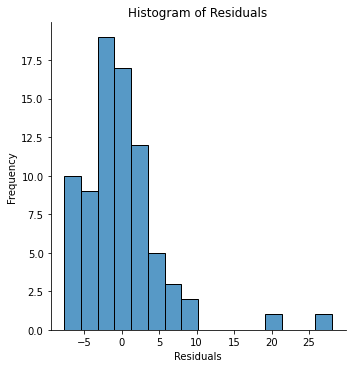

In [28]:
sns.displot(y_test-pred_linreg)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_linreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_linreg)))
print('R^2:',metrics.r2_score(y_test, pred_linreg))

Mean Absolute Error: 3.618647477509701
Mean Squared Error: 29.942846904193583
Root Mean Squared Error: 5.4720057478216875
R^2: 0.6499585031453685


In [30]:
x = regressor.score(X_test, y_test)
print(x)

0.6499585031453686


In [31]:
regressor.score(X_train, y_train)

0.7884805105329418

In [32]:
regressorscore= x*100
print("Regressor Score: ",regressorscore)

Regressor Score:  64.99585031453687


In [33]:
import random
n = random.randint(0,101)
print("Sample number: ", n)

Sample number:  78


In [34]:
sse = np.square(y_test.iloc[n] - pred_linreg[n])
print("The mean squared error is: ", sse)
print("Actual value is: ", y_test.iloc[n])
print("Predicted value is: ", pred_linreg[n])

The mean squared error is:  1.8791090046697245
Actual value is:  14.1
Predicted value is:  15.470805969008643


In [35]:
boston=datasets.load_boston()
x=boston.data[:,:]
y=boston.target
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

(506, 13) (506,)


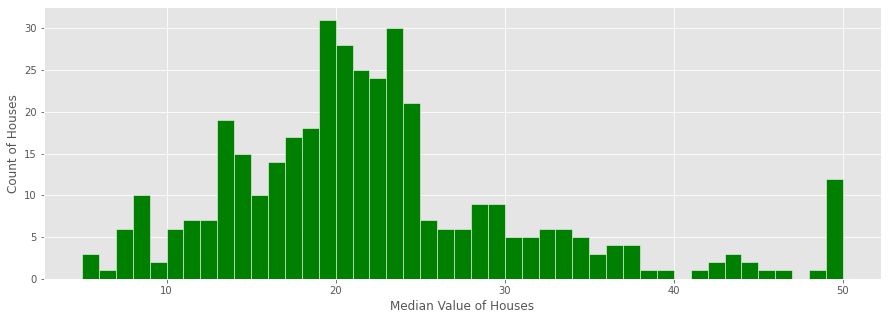

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plot = plt.hist(dataset.MEDV, bins=45, color='g', edgecolor = 'white')
plt.xlabel('Median Value of Houses')
plt.ylabel('Count of Houses')
plt.show()

### **KNN Regression**

In [37]:
def dis(v,w):
    return np.sqrt(np.sum((v-w)**2))
def knn_r(tr, tr_lab, te , k):
    distances = []
    
    for i in range(tr.shape[0]):
        distances.append(dis(tr[i], te))
    
    distances = np.array(distances)
    inds = np.argsort(distances)
    
    distances = distances[inds]
    tr_lab_2 = tr_lab[inds]
    value = np.average(tr_lab_2[:k])
    
    return value

In [38]:
def knn_reg(tr , tr_lab, te , te_lab , k):
    preds = []
    for i in range(te.shape[0]):
        value = knn_r(tr, tr_lab, te[i] , k)
        preds.append(value)
    
    preds  = np.array(preds)
    err = mean_squared_error(te_lab , preds)
    return err
acc = knn_reg(xtrain , ytrain , xtest , ytest ,5)
print ("MEAN SQUARED ERROR:",acc)
print("Actual value is: ", y_test.iloc[n])
print("Predicted value is: ", pred_linreg[n])

MEAN SQUARED ERROR: 25.860125490196076
Actual value is:  14.1
Predicted value is:  15.470805969008643


### **Evaluation Metrics**

In [39]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(xtrain.astype('int'), ytrain.astype('int'))
confusion_matrix(ytest.astype('int'), m.predict(xtest).astype('int'))

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
m.score(xtest.astype('int'), ytest.astype('int'))

0.1568627450980392

In [41]:
accuracy_score(ytest.astype('int'), m.predict(xtest).astype('int'))

0.11764705882352941